# Document-Term Matrix - Bag of Words Model, extreme sparsity, and heuristics

#### Author: Lan, Xing Yang : bilan604@yahoo.com  

Last updated: August 5<sup>th</sup>, 2021

In [1]:
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
original = pd.read_csv("readingsKgFull.csv")
original.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [3]:
excerpts, targets = original["excerpt"], original["target"]
excerpts[0:5], targets[0:5]

(0    When the young people returned to the ballroom...
 1    All through dinner time, Mrs. Fayre was somewh...
 2    As Roger had predicted, the snow departed as q...
 3    And outside before the palace a great garden w...
 4    Once upon a time there were Three Bears who li...
 Name: excerpt, dtype: object, 0   -0.340259
 1   -0.315372
 2   -0.580118
 3   -1.054013
 4    0.247197
 Name: target, dtype: float64)

(-3.676267773, 1.711389827)

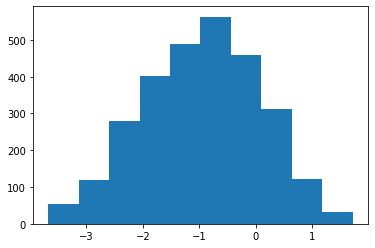

In [4]:
plt.hist(targets.array)
min(targets.array), max(targets.array)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
import re

## Arbituary stemming

In [6]:
stemmer_ = SnowballStemmer(language="english")

def SnowBallstem(words):
    new_words = []
    for i in range(len(words)):
        if len(words[i]) > 3:
            new_words.append(stemmer_.stem(words[i]))
    return new_words

def SBTokenizer(words):
    words = re.sub(r"[^(A-Za-z| )]", "", words).split(" ")
    return " ".join(SnowBallstem(words))

def SBTokenizeAll(corpuses):
    new = []
    for i in range(0,len(corpuses)):
        new.append(SBTokenizer(corpuses[i]))
    return new

In [7]:
SBTokenizer(excerpts[0])

'when young peopl return ballroom present decid chang appear instead interior scene winter landscapeth floor cover with snowwhit canva laid smooth rumpl over bump hillock like real snow field numer palm evergreen that decor room were powder with flour strewn with tuft cotton like snow also diamond dust been light sprinkl them glitter crystal icicl hung from branchesat each room wall hung beauti bearskin rugthes rug were prize girl boy this gameth girl were gather room boy other call north pole other south pole each player given small flag which they were plant reach polethi would have been easi matter each travel oblig wear snowsho'

#### ngram_range=(1,1): only unigrams

In [47]:
## alternatively; different ngram_range, scaling, grouping columns, tf-idf...

In [8]:
## alternatively; token_pattern=r"[A-Za-z]{4,25}", tokenizer=..., analyzer=...
CV = CountVectorizer(ngram_range=(1,1)) 
matrix = CV.fit_transform(SBTokenizeAll(excerpts.array)).toarray()
words = CV.get_feature_names()

In [9]:
len(words)

22386

In [10]:
# alternatively; use pd's drop() function on a list of words, which is slowe

def check_(col):
    # checks for at least n nonzero values
    counter = 0
    while counter < 3: # not defining n for runtime
        for i in range(len(col)):
            if col[i]!= 0:
                counter += 1
        if counter < 3:
            return False
        return True

def drop_cols_(matrix, words):
    # returns a dictionary key: colname value: col
    di = {}
    for j in range(len(words)):
        ## c = matrix[:,j]
        if check_(matrix[:,j]):
            di[words[j]] = matrix[:,j]
    return di

In [11]:
df = pd.DataFrame(drop_cols_(matrix, words))
df

,abandon,abbey,abbrevi,aberr,abid,abil,abl,aboard,abod,abound,...,youv,youyou,zeal,zenith,zero,zeus,zigzag,zinc,zone,zoolog
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 22,386 columns to 6,638  

#### Albeit; and incomplete dictionary

### Train, test splitting for later self evaluation in pandas DF

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
df["y_vari"] = targets
train, test = train_test_split(df, test_size = 0.2, random_state = 12)

In [14]:
X_train, y_train = train.copy().drop(columns="y_vari"), train["y_vari"]
X_test, y_test = test.copy().drop(columns="y_vari"), test["y_vari"]
type(X_train), type(X_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [15]:
X_train.head()

,abandon,abbey,abbrevi,aberr,abid,abil,abl,aboard,abod,abound,...,youv,youyou,zeal,zenith,zero,zeus,zigzag,zinc,zone,zoolog
1685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor

In [16]:
def run_(model):
    model.fit(X_train, y_train)
    print(model, " MSE:", mean_squared_error(y_test, model.predict(X_test)))

#### (Gridsearched hyperparams)

In [19]:
skLin0 = LinearRegression(normalize=True)
skLas0 = Lasso(alpha=0.01)
skRid0 = Ridge(alpha=100)
skSGD0 = SGDRegressor(alpha=0.1)
models = [skLin0, skLas0, skRid0, skSGD0]

In [20]:
for model in models:
    model.fit(X_train, y_train)
    print(model, " MSE:", mean_squared_error(y_test, model.predict(X_test)))

LinearRegression(normalize=True)  MSE: 1.3994777918272397e+25
Lasso(alpha=0.01)  MSE: 0.6526138146048568
Ridge(alpha=100)  MSE: 0.5671541079291023
SGDRegressor(alpha=0.1)  MSE: 0.5632057268591667


## SVD breaking down as seen in Linear Regression; MSE: 1.3994777918272397e+25  

### But why?

sklearn's LinearRegression, is Ordinary Least Squares solved with SVD, while Lasso uses coordinate descent, Ridge automatically chooses a solver which would be a conjugent gradient solver in this example, and SGDRegressor uses stochastic gradient descent.

## I tested out the limit of LinearRegression to be around 1000 passages and their associated reduced columns  

### So lets see what is occuring during SVD when solving OLS  

Wherein OLS parameter vector _x_ in R<sup>n</sup> is approximated using a wide Moore-Penrose pseudoinverse matrix via frobius norm minimization:  
A<sup>+</sup> = V\*S<sup>-1</sup>\*U<sup>T</sup>  
Such that:  
_x_ = A<sup>+</sup>\*b

## In this case with a simple SVD without intercept;  

As n >> m, p=m, S<sub>pxp</sub>, U<sub>nxn</sub> will be reduced to U<sub>nxp</sub> by cutting off the n-p emty columns in the numpy matrix calculations.

In [48]:
from numpy import transpose, diag, dot
from numpy.linalg import svd, inv


class SVD_OLS:
    
    
    def __innit__(self):
        self.X = None
        self.y = None
        self.m = 0
        self.n = 0
        self.params = []
        self.predicted = []  # last pred
        self.USV = []
        self.VSU = []
    
    # helper
    def prod(pair):
        return pair[0]*pair[1]
    
    # helper
    def predict_1(self, di):
        base = 0.0
        for j in range(0, len(di)):
            base += (di[j]*self.params[j,0])
        return float(base)
    
    
    def predict_(self, data):
        data = data.to_numpy()
        base = 0.0
        new_pred = []
        for i in range(0, len(data)):
            new_pred.append(self.predict_1(data[i]))
        self.predicted = new_pred
        return self.predicted
    
    # helper
    def residual_1(self, i):
        return (self.predict_1(i)-self.y[i])**2
    
    
    def rss_(self):
        base = 0.0
        for i in range(0, self.m):
            base += self.residual_1(i)
        return base
    
    # helper
    def genBaseParams(self, X_train, y_train):
        if type(X_train) != np.ndarray:
            self.X = X_train.to_numpy()
        else:
            self.X = X_train
        self.y = []
        for m in y_train:
            self.y.append([m])
        self.y = np.array(self.y)
        self.m, self.n = len(self.X), len(self.X[0])
        return
        
    
    def fit_params_(self):
        # 2-D array X and 2-D array y (list of 1 length lists)
        U,S,Vt = svd(self.X, full_matrices=False)
        V = transpose(Vt)
        S_in = inv(diag(S))
        Ut = transpose(U)
        self.USV = [U, S, Vt]
        self.VSU = [V, S_in, Ut]
        Aplus = dot(dot(V,S_in),Ut)
        fitted = dot(Aplus, self.y)
        return fitted
                          

    def fit_(self, X_tr_, y_tr_):
        self.genBaseParams(X_tr_, y_tr_)
        self.params = self.fit_params_()


    def get_USV_(self):
        if self.USV:
            return self.USV
        return None

    
    def get_VSU_(self):
        if self.VSU:
            return self.VSU
        return None


#### Setting up a control with 800 passages

In [50]:
CV1 = CountVectorizer()
mtx_, cols_ = CV1.fit_transform(SBTokenizeAll(excerpts.array[0:800])).toarray(), CV1.get_feature_names()
d_ = drop_cols_(mtx_, cols_)
t1 = pd.DataFrame(d_)
t1["y_"] = targets[0:800]
tr, ts = train_test_split(t1, test_size = 0.2)
Xtr, ytr = tr.copy().drop(columns="y_"), tr["y_"]
Xts, yts = ts.copy().drop(columns="y_"), ts["y_"]

In [62]:
ols0 = SVD_OLS()
ols0.fit_(Xtr, ytr)
pred0 = ols0.predict_(Xts)
mean_squared_error(yts, pred0)

0.6407164629899695

#### Now with all of them (2267 rows in X_train)

In [64]:
ols1 = SVD_OLS()
ols1.fit_(X_train,y_train)
pred1 = ols1.predict_(X_test)
mean_squared_error(y_test, pred1)

9.337979883305828e+26

#### Surely enough the MSE is monstrous

In [120]:
np.mean(ols0.get_VSU_()[1]), np.mean(ols1.get_USV_()[1])

(0.00017581804821102776, 9.727708010348138)

#### and surely, the diagonal entries of S have increased exponentially

In [121]:
ols1.predicted[0:6]

[17843617891054.684,
 41188599209302.69,
 -28161247837298.863,
 8554822481868.797,
 11122092147420.617,
 7214629692707.3125]

#### so that the MSE is massive

## The trend of MSE as the number of components is increased

In [124]:
from sklearn.decomposition import PCA

In [158]:
i_cache = []
mse_cache = []
for i in range(100, 600, 100):
    pca = PCA(n_components=i)
    pca.fit(X_train)    
    proj = pca.transform(X_train)
    skLin1 = LinearRegression()
    skLin1.fit(proj, y_train)
    projt = pca.fit_transform(X_test)
    i_cache.append(i)
    mse_cache.append(mean_squared_error(y_test, skLin1.predict(projt)))

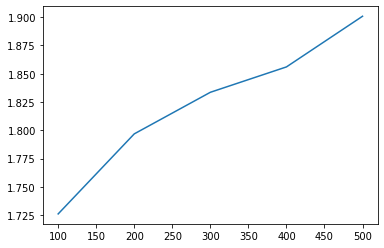

In [159]:
plt.plot(i_cache, mse_cache)

#### ( 567 is all the components availible in the testing set without cross-validation)

# Finally, I'll take a quick loop at our reliable SGD's predictions with a 2 component spectral analysis

In [162]:
vis = skSGD0.predict(X_test)

In [164]:
for i in range(len(vis)):
    if vis[i] < mean(targets.array):
        vis[i] = 0
    else:
        vis[i] = 1

In [174]:
pca = PCA(n_components=2)
pca.fit(X_train)
proj = pca.transform(X_test)

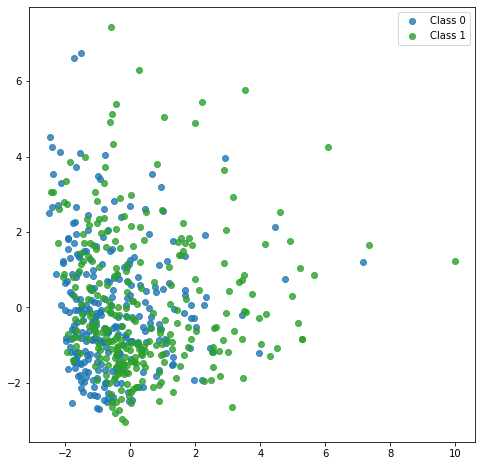

In [175]:
colors = ['tab:blue', 'tab:green']
clusters = vis
plt.figure(figsize=(8,8))
for c in range(0,2):
    plt.scatter(proj[(clusters == c), 0], proj[(clusters == c), 1], c=colors[c], alpha=0.8, label=f'Class {c}')
plt.legend()